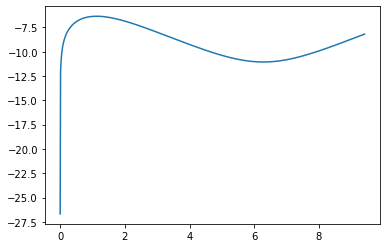

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

class pde:

    def function1(phi,y):
        dphi = y
        return dphi
    
    def function2(phi_1,phi_2,phi_3, y):
        dy = (phi_1-2*phi_2+phi_3)/(dx)**2 - dV(phi_2,1)
        return dy
    
    def RK4_Step(func1,func2,phi_x,y,h):
        for j in range(1,Nx-1):
            
            k1_phi[j] = pde.evaluate(func1, phi_x[j], y[j])
            k1_y[j] = pde.evaluate(func2, phi_x[j+1], phi_x[j], phi_x[j-1], y[j]) 
            
            yp2[j] = y[j] + k1_y[j]*(h/2)
                
            k2_phi[j] = pde.evaluate(func1, phi_x[j]+k1_phi[j]*(h/2), yp2[j])
            k2_y[j] = pde.evaluate(func2, phi_x[j+1]+k1_phi[j]*(h/2), phi_x[j]+k1_phi[j]*(h/2), phi_x[j-1]+k1_phi[j]*(h/2), yp2[j])

            yp3[j] = y[j] + k2_y[j]*(h/2)

            k3_phi[j] = pde.evaluate(func1, phi_x[j]+k2_phi[j]*(h/2), yp3[j])
            k3_y[j] = pde.evaluate(func2, phi_x[j+1]+k2_phi[j]*(h/2), phi_x[j]+k2_phi[j]*(h/2), phi_x[j-1]+k2_phi[j]*(h/2), yp3[j])

            yp4[j] = y[j] + k3_y[j]*h

            k4_phi[j] = pde.evaluate(func1, phi_x[j]+k3_phi[j]*h, yp4[j])
            k4_y[j] = pde.evaluate(func2, phi_x[j+1]+k3_phi[j]*h, phi_x[j]+k3_phi[j]*h, phi_x[j-1]+k3_phi[j]*h, yp4[j])

        return [(h/6)*(k1_y + 2*k2_y + 2*k3_y + k4_y),(h/6)*(k1_phi + 2*k2_phi + 2*k3_phi + k4_phi)]
    
        
    def evaluate(function, *args):
        return eval(function)(*args)
    
def visualize(a,b):
    """Visualize the solution"""
    fig = plt.figure()
    plt.plot(a, b, 'r')
    plt.tight_layout()
    plt.legend(["4th Order RK"], loc=1)
    plt.xlabel('Space', fontsize=17)
    plt.ylabel('Phi', fontsize=17)
    axes = plt.gca()
    axes.set_ylim([-2,2])
    plt.tight_layout()
    plt.show()
    
def energy(y,phi_x,dx,E_t,E_x):
    for j in range(1,Nx-1):
    
        E[j] = (1/2*(y[j])**2 + 1/2*((phi_x[j+1]-phi_x[j-1])/(2*dx))**2)
        
    E_x = np.sum(E)
    
    E_t=np.append(E_t,E_x)
    
    return E_t

    
#--- 
def init():
    
    dx=L/Nx
    dt=T/Nt

    t_range = np.linspace(0,T,Nt)
    x_range = np.linspace(-L/2,L/2,Nx)

    #y = np.zeros(Nx)
    y = np.ndarray(shape=(Nt,Nx))
    phi_x = np.zeros(Nx)
    phi_i = np.ndarray(shape=(Nt,Nx))
    phi_i_1 = np.ndarray(shape=(Nt,Nx))
    phi_i_2 = np.ndarray(shape=(Nt,Nx))
    phi_i_3 = np.ndarray(shape=(Nt,Nx))
    phi_i_4 = np.ndarray(shape=(Nt,Nx))

    E = np.zeros(Nx)
    E_t = np.zeros(0)
    E_x = np.zeros(0)

    kphi_t = np.zeros(0)

    k1_phi=np.zeros(Nx)
    k1_y=np.zeros(Nx)
    yp2=np.zeros(Nx)
    k2_phi=np.zeros(Nx)    
    k2_y=np.zeros(Nx)
    yp3=np.zeros(Nx)
    k3_phi=np.zeros(Nx)
    k3_y=np.zeros(Nx)
    yp4=np.zeros(Nx)
    k4_phi=np.zeros(Nx)
    k4_y=np.zeros(Nx)

    y1=np.ndarray(shape=(Nt,Nx))*0
    y2=np.ndarray(shape=(Nt,Nx))*0
    
    phi_exact = np.ndarray(shape=(Nt,Nx))*0
    p = np.zeros(Nt)
    p_1 = np.zeros(Nt)
    p_2 = np.zeros(Nt)
    pg = np.ndarray(shape=(Nt,Nx))*0
    pg_1 = np.ndarray(shape=(Nt,Nx))*0
    pg_2 = np.ndarray(shape=(Nt,Nx))*0
    ge_1=np.zeros(Nt)
    ge_2=np.zeros(Nt)
    
    return [dx,dt,t_range,x_range,y,phi_i,phi_i_1,phi_i_2,phi_i_3,phi_i_4,E,E_t,E_x,kphi_t,k1_phi,k1_y,yp2,k2_phi,k2_y,yp3,k3_phi,k3_y,yp4,k4_phi,k4_y,y1,y2,phi_exact,p,p_1,p_2,pg,pg_1,pg_2,ge_1,ge_2]


class ibc:
    
    def zero(L,Nx):
        x_range = np.linspace(0,L,Nx)
        phi_i[0] = 0*x_range
        y = np.ones(Nx)
        phi_i[:,0] = 0
        phi_i[:,Nx-1] = 0
        
        return [x_range,phi_i,y]
        
    def gaussian(L,Nx):
        x_range = np.linspace(-L/2,L/2,Nx)
        phi_i[0] = np.exp(-(x_range)**2)
        y[0] = 0
        y[Nx-1] = 0
        phi_i[:,0] = 0
        phi_i[:,Nx-1] = 0
    
        return [x_range,phi_i,y]
    
    def sin(L,Nx):
        x_range = np.linspace(0,L,Nx)
        phi_i[0] = np.sin(x_range)
        y[0] = 0
        y[Nx-1] = 0
        phi_i[:,0] = 0
        phi_i[:,Nx-1] = 0
        
        return [x_range,phi_i,y]
    
    def vacuum(L,Nx): 
        '''plus or minus'''
        x_range = np.linspace(-L/2,L/2,Nx)
        phi_i[0] = -np.ones(Nx)
        y[0] = 0
        y[Nx-1] = 0
        phi_i[:,0] = -1
        phi_i[:,Nx-1] = -1
                           
        return [x_range,phi_i,y]
    
    def kink(L,Nx):
        x_range = np.linspace(-L/2,L/2,Nx)
        phi_i[0] = np.tanh((2)**(1/2)*(x_range))
        phi_i[:,0] = np.tanh((2)**(1/2)*(-L/2))
        phi_i[:,Nx-1] = np.tanh((2)**(1/2)*(L/2))
        y[0] = 0
        y[Nx-1] = 0

        
        return [x_range,phi_i,y]
    
    def boostedkink(L,Nx,T,Nt,beta,i):
        x_range = np.linspace(-L/2,L/2,Nx)
        t_range = np.linspace(0,T,Nt)
        
        phi_i[i] = np.tanh((2)**(1/2)*(1-beta**2)**(-1/2)*((x_range)-beta*t_range[i]))
        phi_i[i,0] = np.tanh((2)**(1/2)**(1-beta**2)**(-1/2)*(-L/2-beta*t_range[i]))
        phi_i[i,Nx-1] = np.tanh((2)**(1/2)**(1-beta**2)**(-1/2)*(L/2-beta*t_range[i]))
        y[i] = (2)**(1/2)*(1-beta**2)**(-1/2)*beta*np.cosh((2)**(1/2)*(1-beta**2)**(-1/2)*((x_range)-beta*t_range[i]))**(-2)
        y[i,0] = (2)**(1/2)*(1-beta**2)**(-1/2)*beta*np.cosh((2)**(1/2)*(1-beta**2)**(-1/2)*(-L/2-beta*t_range[i]))**(-2)
        y[i,Nx-1] = (2)**(1/2)*(1-beta**2)**(-1/2)*beta*np.cosh((2)**(1/2)*(1-beta**2)**(-1/2)*(L/2-beta*t_range[i]))**(-2)  
        return [x_range,phi_i[i],y[i]]
    
    def kinkcollision(L,Nx,T,Nt,beta1,beta2,i):
        x_range = np.linspace(-L/2,L/2,Nx)
        t_range = np.linspace(0,T,Nt)
        
        phi_i_1[i] = np.tanh((2)**(1/2)*(1-beta1**2)**(-1/2)*((x_range+L/2)-beta1*t_range[i]))
        phi_i_1[i,0] = np.tanh((2)**(1/2)**(1-beta1**2)**(-1/2)*(0-beta1*t_range[i]))
        phi_i_1[i,Nx-1] = np.tanh((2)**(1/2)**(1-beta1**2)**(-1/2)*(L-beta1*t_range[i]))
        y1[i] = (2)**(1/2)*(1-beta1**2)**(-1/2)*beta1*np.cosh((2)**(1/2)*(1-beta1**2)**(-1/2)*((x_range+L/2)-beta1*t_range[i]))**(-2)
        y1[i,0] = (2)**(1/2)*(1-beta1**2)**(-1/2)*beta1*np.cosh((2)**(1/2)*(1-beta1**2)**(-1/2)*(0-beta1*t_range[i]))**(-2)
        y1[i,Nx-1] = (2)**(1/2)*(1-beta1**2)**(-1/2)*beta1*np.cosh((2)**(1/2)*(1-beta1**2)**(-1/2)*(L-beta1*t_range[i]))**(-2)
        
        
        phi_i_2[i] = np.tanh((2)**(1/2)*(1-beta2**2)**(-1/2)*((-x_range+L/2)-beta2*t_range[i]))
        phi_i_2[i,0] = np.tanh((2)**(1/2)**(1-beta2**2)**(-1/2)*(L-beta2*t_range[i]))
        phi_i_2[i,Nx-1] = np.tanh((2)**(1/2)**(1-beta2**2)**(-1/2)*(0-beta2*t_range[i]))
        y2[i] = (2)**(1/2)*(1-beta2**2)**(-1/2)*beta2*np.cosh((2)**(1/2)*(1-beta2**2)**(-1/2)*((-x_range+L/2)-beta2*t_range[i]))**(-2)
        y2[i,0] = (2)**(1/2)*(1-beta2**2)**(-1/2)*beta2*np.cosh((2)**(1/2)*(1-beta2**2)**(-1/2)*(L/2-beta2*t_range[i]))**(-2)
        y2[i,Nx-1] = (2)**(1/2)*(1-beta2**2)**(-1/2)*beta2*np.cosh((2)**(1/2)*(1-beta2**2)**(-1/2)*(0-beta2*t_range[i]))**(-2)
        
                   
        return [x_range,phi_i_1[i],phi_i_2[i],y1[i],y2[i]]
    
def dV(phi_2,m):
    m=1
    
    dV = 4*(phi_2**2-1)*phi_2
    
    #dV = 0
    
    #dV=m**2*phi_2
    
    return dV

def convergence(phi_i_n,x0,i,j):
    '''phi_i_1 with step size h and phi_i_2 with step size h/2'''
    
    '''solve for p at each point in time, only at a single point=pi/2,
    currently taking different point due to two different x_ranges'''
    
    '''kink'''
    #phi_exact[0] = np.tanh((2)**(1/2)*(x_range))
    
    '''colliding kink'''
    #phi_exact[i] = np.tanh((2)**(1/2)*(1-beta1**2)**(-1/2)*((x_range[x0]+L/2)-beta1*t_range[i]))+ np.tanh((2)**(1/2)*(1-beta2**2)**(-1/2)*((-x_range[x0]+L/2)-beta2*t_range[i]))
    
    '''boosted kink'''
    #phi_exact[i] = np.tanh((2)**(1/2)*(1-beta**2)**(-1/2)*((x_range[x0])-beta*t_range[i]))
    
    #phi_exact[i] = np.sin(2**(1/2)*t_range[i]-x_range[x0])
    
    '''local error'''
    #p[i]=math.log2(abs(phi_i_n[i,x0]-phi_exact[i,x0]))
    
    '''global error'''
    pg[i,j]= (abs(phi_i_n[i,j]-phi_exact[0,j]))**2
    
    return pg[i,j]


i=1
j=1


#---
Nt = 800
Nx = 40
L = 2*math.pi
T = 3*math.pi
x0=18

beta=0.9

beta1=0.5
beta2=0.5
    
[dx,dt,t_range,x_range,y,phi_i,phi_i_1,phi_i_2,phi_i_3,phi_i_4,E,E_t,E_x,kphi_t,k1_phi,k1_y,yp2,k2_phi,k2_y,yp3,k3_phi,k3_y,yp4,k4_phi,k4_y,y1,y2,phi_exact,p,p_1,p_2,pg,pg_1,pg_2,ge_1,ge_2]=init()

for i in range(0,Nt):
    for j in range(0,Nx):
        phi_exact[i,j] = np.tanh((2)**(1/2)*(1-beta1**2)**(-1/2)*((x_range[j]+L/2)-beta1*t_range[i]))+ np.tanh((2)**(1/2)*(1-beta2**2)**(-1/2)*((-x_range[j]+L/2)-beta2*t_range[i]))

cge_1=np.zeros(Nt)
'''calling initial conditions'''
#[x_range,phi_i,y] = ibc.kink(L,Nx)

for i in range(0,Nt-1):
    [x_range,phi_i_1[i],phi_i_2[i],y1[i],y2[i]] = ibc.kinkcollision(L,Nx,T,Nt,beta1,beta2,i)
    
for i in range(0,Nt-1):

    [ky,kphi] = pde.RK4_Step('pde.function1','pde.function2',phi_i_1[i],y1[i],dt)
    
    y1[i+1] = y1[i] + ky
    phi_i_1[i+1] = phi_i_1[i] + kphi
    
for i in range(0,Nt-1):
    [x_range,phi_i_1[i],phi_i_2[i],y1[i],y2[i]] = ibc.kinkcollision(L,Nx,T,Nt,beta1,beta2,i)
    
    [ky,kphi] = pde.RK4_Step('pde.function1','pde.function2',phi_i_2[i],y2[i],dt)
    
    y2[i+1] = y2[i] + ky
    phi_i_2[i+1] = phi_i_2[i] + kphi
    
for i in range(0,Nt-1):
    phi_i_3[i]=phi_i_1[i]+phi_i_2[i]
    
    for j in range(0,Nx):
        pg_1[i,j]=(abs(phi_i_3[i,j]-phi_exact[i,j]))**2
    
    ge_1[i]=(np.sum(pg_1[i]))**(1/2)
    
    cge_1[i]=math.log2(abs(ge_1[i]))
    
    
    
#---
Nt = 800
Nx = 80
L = 2*math.pi
T = 3*math.pi
x0=18

beta=0.9

beta1=0.5
beta2=0.5

[dx,dt,t_range,x_range,y,phi_i,phi_i_1,phi_i_2,phi_i_3,phi_i_4,E,E_t,E_x,kphi_t,k1_phi,k1_y,yp2,k2_phi,k2_y,yp3,k3_phi,k3_y,yp4,k4_phi,k4_y,y1,y2,phi_exact,p,p_1,p_2,pg,pg_1,pg_2,ge_1,ge_2]=init()

for i in range(0,Nt):
    for j in range(0,Nx):
        phi_exact[i,j] = np.tanh((2)**(1/2)*(1-beta1**2)**(-1/2)*((2*x_range[j]+L/2)-beta1*t_range[i]))+ np.tanh((2)**(1/2)*(1-beta2**2)**(-1/2)*((-2*x_range[j]+L/2)-beta2*t_range[i]))

cge_2=np.zeros(Nt)

for i in range(0,Nt-1):
    [x_range,phi_i_1[i],phi_i_2[i],y1[i],y2[i]] = ibc.kinkcollision(L,Nx,T,Nt,beta1,beta2,i)
    
for i in range(0,Nt-1):

    [ky,kphi] = pde.RK4_Step('pde.function1','pde.function2',phi_i_1[i],y1[i],dt)
    
    y1[i+1] = y1[i] + ky
    phi_i_1[i+1] = phi_i_1[i] + kphi
    
for i in range(0,Nt-1):
    [x_range,phi_i_1[i],phi_i_2[i],y1[i],y2[i]] = ibc.kinkcollision(L,Nx,T,Nt,beta1,beta2,i)
    
    [ky,kphi] = pde.RK4_Step('pde.function1','pde.function2',phi_i_2[i],y2[i],dt)
    
    y2[i+1] = y2[i] + ky
    phi_i_2[i+1] = phi_i_2[i] + kphi
    
for i in range(0,Nt-1):
    phi_i_3[i]=phi_i_1[i]+phi_i_2[i]
    
    for j in range(0,Nx):
        pg_2[i,j]=(abs(phi_i_3[i,j]-phi_exact[i,j]))**2
    
    ge_2[i]=(np.sum(pg_2[i]))**(1/2)
    
    cge_2[i]=math.log2(abs(ge_2[i]))
    
    cge_3[i]=cge_1[i]-cge_2[i]
    
    
fig = plt.figure()
plt.plot(t_range, cge_3)

#     visualize(x_range,phi_i_3[i])

def animate(i):
    line.set_data(x_range, phi_i_3[i])
#     line.set_data(x_range, phi_i[i])
    
    return line

# fig = plt.figure()
# ax = plt.axes(xlim=(x_range[0], x_range[-1]), ylim=(-2,2))
# (line,) = ax.plot([], [], lw=2)
# anim = FuncAnimation(fig, animate, frames=1000)
# anim.save('boosted(beta=0.5).mp4', fps=30)


In [ ]:
'''convergence test'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

class pde:

    def function1(phi,y):
        dphi = y
        return dphi
    
    def function2(phi_1,phi_2,phi_3, y):
        dy = (phi_1-2*phi_2+phi_3)/(dx)**2 - dV(phi_2,1)
        return dy
    
    def RK4_Step(func1,func2,phi_x,y,h):
        for j in range(1,Nx-1):
            
            k1_phi[j] = pde.evaluate(func1, phi_x[j], y[j])
            k1_y[j] = pde.evaluate(func2, phi_x[j+1], phi_x[j], phi_x[j-1], y[j]) 
                
            yp2[j] = y[j] + k1_y[j]*(h/2)
                
            k2_phi[j] = pde.evaluate(func1, phi_x[j]+k1_phi[j]*(h/2), yp2[j])
            k2_y[j] = pde.evaluate(func2, phi_x[j+1]+k1_phi[j]*(h/2), phi_x[j]+k1_phi[j]*(h/2), phi_x[j-1]+k1_phi[j]*(h/2), yp2[j])

            yp3[j] = y[j] + k2_y[j]*(h/2)

            k3_phi[j] = pde.evaluate(func1, phi_x[j]+k2_phi[j]*(h/2), yp3[j])
            k3_y[j] = pde.evaluate(func2, phi_x[j+1]+k2_phi[j]*(h/2), phi_x[j]+k2_phi[j]*(h/2), phi_x[j-1]+k2_phi[j]*(h/2), yp3[j])

            yp4[j] = y[j] + k3_y[j]*h

            k4_phi[j] = pde.evaluate(func1, phi_x[j]+k3_phi[j]*h, yp4[j])
            k4_y[j] = pde.evaluate(func2, phi_x[j+1]+k3_phi[j]*h, phi_x[j]+k3_phi[j]*h, phi_x[j-1]+k3_phi[j]*h, yp4[j])
        
        return [(h/6)*(k1_y + 2*k2_y + 2*k3_y + k4_y),(h/6)*(k1_phi + 2*k2_phi + 2*k3_phi + k4_phi)]
    
        
    def evaluate(function, *args):
        return eval(function)(*args)
    
def visualize(a,b):
    """Visualize the solution"""
    fig = plt.figure()
    plt.plot(a, b, 'r')
    plt.tight_layout()
    plt.legend(["4th Order RK"], loc=1)
    plt.xlabel('Space', fontsize=17)
    plt.ylabel('Phi', fontsize=17)
    axes = plt.gca()
    axes.set_ylim([-2,2])
    plt.tight_layout()
    plt.show()
    
def energy(y,phi_x,dx,E_t,E_x):
    for j in range(1,Nx-1):
    
        E[j] = (1/2*(y[j])**2 + 1/2*((phi_x[j+1]-phi_x[j-1])/(2*dx))**2)
        
    E_x = np.sum(E)
    
    E_t=np.append(E_t,E_x)
    
    return E_t

def animate(i):
    print(i)
    line.set_data(x_range, phi_i[i])
    
    return line
    
#--- 
def init():
    
    dx=L/Nx
    dt=T/Nt

    t_range = np.linspace(0,T,Nt)

    y = np.zeros(Nx)
    phi_x = np.zeros(Nx)
    phi_i = np.ndarray(shape=(Nt,Nx))
    phi_i_1 = np.ndarray(shape=(Nt,Nx))*0
    phi_i_2 = np.ndarray(shape=(Nt,Nx))*0
    phi_i_3 = np.ndarray(shape=(Nt,Nx))*0
    phi_i_4 = np.ndarray(shape=(Nt,Nx))*0

    E = np.zeros(Nx)
    E_t = np.zeros(0)
    E_x = np.zeros(0)

    kphi_t = np.zeros(0)

    k1_phi=np.zeros(Nx)
    k1_y=np.zeros(Nx)
    yp2=np.zeros(Nx)
    k2_phi=np.zeros(Nx)    
    k2_y=np.zeros(Nx)
    yp3=np.zeros(Nx)
    k3_phi=np.zeros(Nx)
    k3_y=np.zeros(Nx)
    yp4=np.zeros(Nx)
    k4_phi=np.zeros(Nx)
    k4_y=np.zeros(Nx)

    y1=np.zeros(Nx)
    y2=np.zeros(Nx)
    
    phi_exact = np.ndarray(shape=(Nt,Nx))
    p = np.zeros(Nt)
    p_1 = np.zeros(Nt)
    p_2 = np.zeros(Nt)
    pg = np.ndarray(shape=(Nt,Nx))
    pg_1 = np.ndarray(shape=(Nt,Nx))
    pg_2 = np.ndarray(shape=(Nt,Nx))
    ge_1=np.zeros(Nt)
    ge_2=np.zeros(Nt)
    
    return [dx,dt,t_range,y,phi_i,phi_i_1,phi_i_2,phi_i_3,phi_i_4,E,E_t,E_x,kphi_t,k1_phi,k1_y,yp2,k2_phi,k2_y,yp3,k3_phi,k3_y,yp4,k4_phi,k4_y,y1,y2,phi_exact,p,p_1,p_2,pg,pg_1,pg_2,ge_1,ge_2]


class ibc:
    
    def zero(L,Nx):
        x_range = np.linspace(0,L,Nx)
        phi_i[0] = 0*x_range
        y = np.ones(Nx)
        phi_i[:,0] = 0
        phi_i[:,Nx-1] = 0
        
        return [x_range,phi_i,y]
        
    def gaussian(L,Nx):
        x_range = np.linspace(-L/2,L/2,Nx)
        phi_i[0] = np.exp(-(x_range)**2)
        y[0] = 0
        y[Nx-1] = 0
        phi_i[:,0] = 0
        phi_i[:,Nx-1] = 0
    
        return [x_range,phi_i,y]
    
    def sin(L,Nx):
        x_range = np.linspace(0,L,Nx)
        phi_i[0] = np.sin(x_range)
        y[0] = 0
        y[Nx-1] = 0
        phi_i[:,0] = 0
        phi_i[:,Nx-1] = 0
        
        return [x_range,phi_i,y]
    
    def vacuum(L,Nx): 
        '''plus or minus'''
        x_range = np.linspace(-L/2,L/2,Nx)
        phi_i[0] = -np.ones(Nx)
        y[0] = 0
        y[Nx-1] = 0
        phi_i[:,0] = -1
        phi_i[:,Nx-1] = -1
                           
        return [x_range,phi_i,y]
    
    def kink(L,Nx):
        x_range = np.linspace(-L/2,L/2,Nx)
        phi_i[0] = np.tanh((2)**(1/2)*(x_range))
        y[0] = 0
        y[Nx-1] = 0
        phi_i[:,0] = np.tanh((2)**(1/2)*(-L/2))
        phi_i[:,Nx-1] = np.tanh((2)**(1/2)*(L/2))
        
        return [x_range,phi_i,y]
    
    def boostedkink(L,Nx,T,Nt,beta,i):
        x_range = np.linspace(-L/2,L/2,Nx)
        t_range = np.linspace(0,T,Nt)
        phi_i[i] = np.tanh((2)**(1/2)*(1-beta**2)**(-1/2)*((x_range)-beta*t_range[i]))
        phi_i[i,0] = np.tanh((2)**(1/2)**(1-beta**2)**(-1/2)*(-L/2-beta*t_range[i]))
        phi_i[i,Nx-1] = np.tanh((2)**(1/2)**(1-beta**2)**(-1/2)*(L/2-beta*t_range[i]))
        y[0] = (2)**(1/2)*(1-beta**2)**(-1/2)*beta*np.cosh((2)**(1/2)*(1-beta**2)**(-1/2)*(-L/2-beta*t_range[i]))**(-2)
        y[Nx-1] = (2)**(1/2)*(1-beta**2)**(-1/2)*beta*np.cosh((2)**(1/2)*(1-beta**2)**(-1/2)*(L/2-beta*t_range[i]))**(-2)  
        return [x_range,phi_i[i],y]
    
    def kinkcollision(L,Nx,T,Nt,beta1,beta2,i):
        x_range = np.linspace(-L/2,L/2,Nx)
        t_range = np.linspace(0,T,Nt)
        
        phi_i_1[i] = np.tanh((2)**(1/2)*(1-beta1**2)**(-1/2)*((x_range+L/2)-beta1*t_range[i]))
        phi_i_1[i,0] = np.tanh((2)**(1/2)**(1-beta1**2)**(-1/2)*(0-beta1*t_range[i]))
        phi_i_1[i,Nx-1] = np.tanh((2)**(1/2)**(1-beta1**2)**(-1/2)*(L-beta1*t_range[i]))
        y1[0] = (2)**(1/2)*(1-beta1**2)**(-1/2)*beta1*np.cosh((2)**(1/2)*(1-beta1**2)**(-1/2)*(0-beta1*t_range[i]))**(-2)
        y1[Nx-1] = (2)**(1/2)*(1-beta1**2)**(-1/2)*beta1*np.cosh((2)**(1/2)*(1-beta1**2)**(-1/2)*(L-beta1*t_range[i]))**(-2)

        phi_i_2[i] = np.tanh((2)**(1/2)*(1-beta2**2)**(-1/2)*((-x_range+L/2)-beta2*t_range[i]))
        phi_i_2[i,0] = np.tanh((2)**(1/2)**(1-beta2**2)**(-1/2)*(L-beta2*t_range[i]))
        phi_i_2[i,Nx-1] = np.tanh((2)**(1/2)**(1-beta2**2)**(-1/2)*(0-beta2*t_range[i]))
        y2[0] = (2)**(1/2)*(1-beta2**2)**(-1/2)*beta2*np.cosh((2)**(1/2)*(1-beta2**2)**(-1/2)*(L/2-beta2*t_range[i]))**(-2)
        y2[Nx-1] = (2)**(1/2)*(1-beta2**2)**(-1/2)*beta2*np.cosh((2)**(1/2)*(1-beta2**2)**(-1/2)*(0-beta2*t_range[i]))**(-2)
                   
        phi_i[i] = phi_i_1[i] + phi_i_2[i]
        y = y1 +y2
                   
        return [x_range,phi_i[i],y]
    
def dV(phi_2,m):
    m=1
    
    dV = 4*(phi_2**2-1)*phi_2
    #dV = 0
    #dV=m**2*phi_2
    
    return dV

def convergence(phi_i_n,x0,i,j):
    '''phi_i_1 with step size h and phi_i_2 with step size h/2'''
    
    '''solve for p at each point in time, only at a single point=pi/2,
    currently taking different point due to two different x_ranges'''
    
    '''kink'''
    phi_exact[0] = np.tanh((2)**(1/2)*(x_range))
    
    '''colliding kink'''
    #phi_exact[i] = np.tanh((2)**(1/2)*(1-beta1**2)**(-1/2)*((x_range[x0]+L/2)-beta1*t_range[i]))+ np.tanh((2)**(1/2)*(1-beta2**2)**(-1/2)*((-x_range[x0]+L/2)-beta2*t_range[i]))
    
    '''boosted kink'''
    #phi_exact[i] = np.tanh((2)**(1/2)*(1-beta**2)**(-1/2)*((x_range[x0])-beta*t_range[i]))
    
    #phi_exact[i] = np.sin(2**(1/2)*t_range[i]-x_range[x0])
    
    '''local error'''
    #p[i]=math.log2(abs(phi_i_n[i,x0]-phi_exact[i,x0]))
    
    '''global error'''
    pg[i,j]= (abs(phi_i_n[i,j]-phi_exact[0,j]))**2
    
    return pg[i,j]

beta=0.5
beta1=0.8
beta2=0.8
i=1
x0=18

#---
Nt = 800
Nx = 40
L = 2*math.pi
T = 2*math.pi
    
[dx,dt,t_range,y,phi_i,phi_i_1,phi_i_2,phi_i_3,phi_i_4,E,E_t,E_x,kphi_t,k1_phi,k1_y,yp2,k2_phi,k2_y,yp3,k3_phi,k3_y,yp4,k4_phi,k4_y,y1,y2,phi_exact,p,p_1,p_2,pg,pg_1,pg_2,ge_1,ge_2]=init()


'''i think the problem is that my rk4 loop is not linked with the time component of my phi which i call in my initial condition,
hence the time variable does not iterate'''

'''currently taking exact value at each time step and inputing it into rk4 to get approximate value for time dependent solutions at each time step,
but this con only be half right as we are assuming we know the exact solution at every time step'''

'''calling initial conditions'''
[x_range,phi_i,y] = ibc.kink(L,Nx)
#[x_range,phi_i[i],y] = ibc.kinkcollision(L,Nx,T,Nt,beta1,beta2,i)
"""change from phi_i to phi_i[i] depending on output"""

cge_1=np.zeros(Nt)

for i in range(0,Nt-1):
    
    '''must return output phi_i directly into rk4 if it depends on tiem'''
    
    [ky,kphi] = pde.RK4_Step('pde.function1','pde.function2',phi_i[i],y,dt)
    #[ky,kphi] = pde.RK4_Step('pde.function1','pde.function2',ibc.kinkcollision(L,Nx,T,Nt,beta1,beta2,i)[1],y,dt)
    y = y + ky

    phi_i[i+1] = phi_i[i] + kphi
    
    
    phi_i_3[i+1]=phi_i[i+1]
    
    '''local error calc'''
    #p_1[i-1] = convergence(phi_i_3,x0,i,j)
    
    '''global error calc'''
    for j in range(1,Nx-1):
        
        pg_1[i,j]=convergence(phi_i_3,x0,i,j)
    
    ge_1[i]=(np.sum(pg_1[i,:]))**(1/2)
    
    cge_1[i]=math.log2(abs(ge_1[i]))
    
    
    visualize(x_range,phi_i[i])
    
    #E_t = energy(y,phi_i[i],dx,E_t,E_x)

ge_1[0]=ge_1[1]=ge_1[2]
ge_1[-1]=ge_1[-2]

cge_1[0]=cge_1[1]=cge_1[2]
cge_1[-1]=cge_1[-2]

# fig = plt.figure()
# ax = plt.axes(xlim=(x_range[0], x_range[-1]), ylim=(-2,2))
# (line,) = ax.plot([], [], lw=2)
# anim = FuncAnimation(fig, animate, frames=1000)
# anim.save('test.mp4', fps=30)
#---
    
Nt = 800
Nx = 80
L = 2*math.pi
T = 2*math.pi
    
[dx,dt,t_range,y,phi_i,phi_i_1,phi_i_2,phi_i_3,phi_i_4,E,E_t,E_x,kphi_t,k1_phi,k1_y,yp2,k2_phi,k2_y,yp3,k3_phi,k3_y,yp4,k4_phi,k4_y,y1,y2,phi_exact,p,p_1,p_2,pg,pg_1,pg_2,ge_1,ge_2]=init()

'''calling initial conditions'''
[x_range,phi_i,y] = ibc.kink(L,Nx)
#[x_range,phi_i[i],y] = ibc.kinkcollision(L,Nx,T,Nt,beta1,beta2,i)
"""change from phi_i to phi_i[i] depending on output"""

cge_2=np.zeros(Nt)

for i in range(0,Nt-1):
    
    [ky,kphi] = pde.RK4_Step('pde.function1','pde.function2',phi_i[i],y,dt)
    #[ky,kphi] = pde.RK4_Step('pde.function1','pde.function2',ibc.kinkcollision(L,Nx,T,Nt,beta1,beta2,i)[1],y,dt)
    y = y + ky
    
    phi_i[i+1] = phi_i[i] + kphi
    
    phi_i_4[i+1]=phi_i[i+1]
    
    #p_2[i-1] = convergence(phi_i_4,2*x0,i,j)
    
    for j in range(1,Nx-1):
        
        pg_2[i,j]=convergence(phi_i_4,2*x0,i,j)

    ge_2[i]=(np.sum(pg_2[i,:]))**(1/2)

    cge_2[i]=math.log2(abs(ge_2[i]))
    
'''find errors'''

#p=p_1-p_2
#p[-2]=p[-1]=p[-3]

ge_2[0]=ge_2[1]=ge_2[2]
ge_2[-1]=ge_2[-2]

cge_2[0]=cge_2[1]=cge_2[2]
cge_2[-1]=cge_2[-2]

cge_3=cge_1-cge_2

fig = plt.figure()
plt.plot(t_range, cge_3)


#print(np.around(E_t,2))


#fig = plt.figure()
#ax = plt.axes(xlim=(x_range[0], x_range[-1]), ylim=(2,-2))
#(line,) = ax.plot([], [], lw=2)
#anim = FuncAnimation(fig, animate, frames=1000)
#anim.save('kinkcollision(beta=0.9).mp4', fps=30)
    
